# Определение стоимости автомобилей

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Юсуп! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Описание данных

Данные находятся в файле `/datasets/autos.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/autos.csv).

**Признаки**

- *DateCrawled* — дата скачивания анкеты из базы
- *VehicleType* — тип автомобильного кузова
- *RegistrationYear* — год регистрации автомобиля
- *Gearbox* — тип коробки передач
- *Power* — мощность (л. с.)
- *Model* — модель автомобиля
- *Kilometer* — пробег (км)
- *RegistrationMonth* — месяц регистрации автомобиля
- *FuelType* — тип топлива
- *Brand* — марка автомобиля
- *Repaired* — была машина в ремонте или нет
- *DateCreated* — дата создания анкеты
- *NumberOfPictures* — количество фотографий автомобиля
- *PostalCode* — почтовый индекс владельца анкеты (пользователя)
- *LastSeen* — дата последней активности пользователя

**Целевой признак**

*Price* — цена (евро)

# Подготовка данных

## Загрузка данных

In [1]:
!pip install missingno

In [2]:
!pip install scikit-learn

In [3]:
!pip install lightgbm

In [4]:
!pip install catboost

In [5]:
# Библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import (
OneHotEncoder, 
OrdinalEncoder, 
StandardScaler, 
MinMaxScaler, 
LabelEncoder)
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import (
make_scorer,
mean_squared_error, 
mean_absolute_error)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


import warnings
import time
import missingno as msno

In [6]:
RANDOM_STATE = 42
TEST_SIZE = 0.25


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 

<div class="alert alert-warning">


Совет:

    

   

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 



In [7]:
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/autos.csv', parse_dates=['DateCrawled', 'DateCreated', 'LastSeen'])



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:
    
    
- Ещё есть такой интересный аргумент при чтении как  parse_dates - позволяет указать какие столбцы в DataFrame содержат даты и время. Если у нас установлен верный тип данных, это значит что мы можем легко вытасиквать информацию о годе, месяце, дня, времени, можем вычитать, прибавлять из столбца с датами другой столбец с датами, получая осмысленную информацию
    
Как раз для нашего проекта
    
    



In [9]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


**Описание датасета**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  DateCreated        354369 non-null  datetime64[ns]
 13  NumberOfPictures   354369 non-null  int64   

**Промежуточный вывод:**

Один датасет - `data` (354368 строк, 16 столбцов)

У всех столбцов, кроме `DataCrawled`, правильный тип данных. Есть пропуски, названия нужно привести к нижнему регистру

## Предобработка данных

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


Если данные не представляют интересы для модели то почему бы их и не убрать
    

    
<div class="alert alert-warning">



Совет 🤔:    

- по почтовому индексу можно определить страну где автомобиль скорее всего эксплуатировался. Это конечно потребует сбора информации, но возможно если мы более 8000 индексов превратим в конкретный перечень двух десятков стран, модель сможет на этом найти что то интересное, хотя это не точно )    

    
- еще можно было заметить что в месяцах у нас 13 уникальных значений, а месяцев как известно 12, возможно c нулями тоже стоило удалить  строки как  сомнительные (И только потом убрать RegistrationMonth rак не информативный столбец)     

In [11]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


Исправим названия столбцов и переведем в нижний регистр

In [12]:
data.columns = [x.lower() for x in data.columns]

In [13]:
data = data.rename(columns={'vehicletype': 'vehicle_type',
                            'registrationyear': 'registration_year',
                            'fueltype': 'fuel_type',
                            'datecreated': 'date_created',
                            'numberofpictures': 'number_of_pictures',
                            'postalcode': 'postal_code',
                            'datecrawled': 'date_crawled',
                            'registrationmonth': 'registration_month',
                            'lastseen': 'last_seen'})




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 помнишь о стилистике



    
 <div class="alert alert-warning">


Совет: 

 

        
     
- Здесь название столбцов прдставлены в верблюжем стиле,  привычнее видеть змеиный вид, можно попробовать использовать регуляризацию (предварительная импортировав  соответствующую библиотеку)   
    
    
    df.rename(columns=lambda x: re.sub(r'(?<!^)([A-Z])', r'_\1', x).lower())     
     
    

- Кроме того существует удобная библиотека для выполнения рутинных операций в пандасе, называемая [skimpy](https://pypi.org/project/skimpy/), в этой библиотеке доступна функция clean_column(), которая позволяет легко привести названия столбцов к соответствующему формату в одно действие. Но это уже для случаев когда название столбцов нам даны на латинице     
     


In [14]:
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

Посмотрим на уникальные значения категориальных данных

In [15]:
data['vehicle_type'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [16]:
data['gearbox'].unique()

array(['manual', 'auto', nan], dtype=object)

In [17]:
data['fuel_type'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

Заменим gasoline на petrol (это одно и то же)

In [18]:
data = data.replace({'gasoline': 'petrol'})

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍


 

In [19]:
data['brand'].unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

In [20]:
data['repaired'].unique()

array([nan, 'yes', 'no'], dtype=object)

### Обработка пропусков и дубликатов

In [21]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

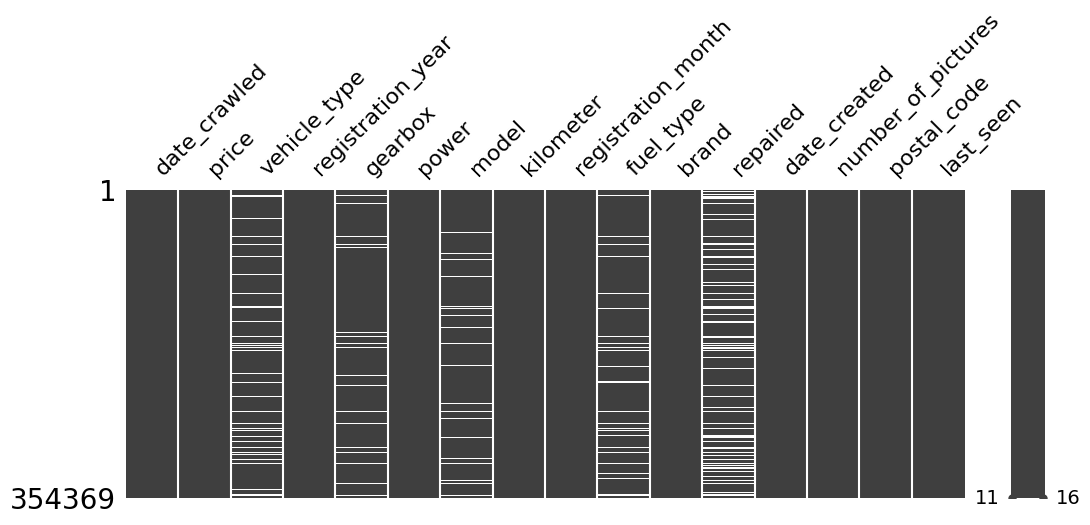

In [22]:
msno.matrix(data, figsize=(12, 4));

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Есть такая библиотека msinfo (как-то так) , очень красиво строит пропуски

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Сделано

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍 По-моему очень наглядно


 

Самое большое количество пропусков у `repaired`. 

<ins>Заполнять данные, по возможности, будем модой для каждой категории отдельно</ins> 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет 🤔:   
    
    

    

 
    
    
- по логике моделирования мы имеем информацию только о тренировочной выборке, поэтому если делать всё правильно, то мы сначала делаем сплит, затем применяем твою логику заполнение на тренировочной выборке, а затем используем ее на валидационной и тестовой выборке (тут аналогия с Scaler, когда мы делаем .fit на тренировочный  а потом .transform на валидационной\тестовой). А так как ты используешь GridSearch, то стоит еще твою функцию преобразования засунуть в pipeline. Ниже ты используешь в pipeline Scaler чтобы избежать утчечку данных, но как нам в pipeline засунуть собственную функцию преобразования?! Можешь взять за основу [Ссылка 1](https://dzen.ru/media/id/5ee6f73b7cadb75a66e4c7e3/sozdanie-polzovatelskih-preobrazovatelei-dannyh-62b2a9a80e49941961ffc7a2),
[Ссылка 2](https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156). Обрати внимание что мы создаём, в котором есть наследование от TransformerMixin и BaseEstimator, именно это позволяет потом применить .fit и .transform.  

**Пропуски в столбце `repaired`**

In [23]:
data.isna().sum()

date_crawled              0
price                     0
vehicle_type          37490
registration_year         0
gearbox               19833
power                     0
model                 19705
kilometer                 0
registration_month        0
fuel_type             32895
brand                     0
repaired              71154
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
dtype: int64

In [24]:
data['repaired'].head(10)

0    NaN
1    yes
2    NaN
3     no
4     no
5    yes
6     no
7     no
8    NaN
9    NaN
Name: repaired, dtype: object

Скорее всего, значения NaN здесь стоят потому, что пользователи при отсутствии ремонта не заполняли этот пункт. Заполним пропуски категорией 'no'

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Не факт, но аргументация присутствует

 

In [25]:
data['repaired'] = data['repaired'].fillna('no')

**Пропуски в столбце `vehicle_type`**

Удалим те автомобили, у которых отсутствуют данные о типе кузова и модели одновременно

In [26]:
data = data.drop(data[data['vehicle_type'].isna()&data['model'].isna()].index, axis=0)

Больше всего пропусков по типу кузова у Гольфа, Поло, Корса и т.п. Попробуем заполнить их модой

In [27]:
data.loc[data['vehicle_type'].isna(), 'model'].value_counts()

model
golf          4035
other         1859
polo          1600
corsa         1576
3er           1312
              ... 
200              1
rangerover       1
serie_1          1
q3               1
b_max            1
Name: count, Length: 241, dtype: int64

Ниже мы вычисляем моду типа кузова по модели и заполняем ей пропуски. 

In [28]:
data.loc[data['vehicle_type'].isna(), 'vehicle_type'] = \
(data.groupby('model')['vehicle_type'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [29]:
print('Количество пропусков в "vehicle_type":', data['vehicle_type'].isna().sum())

Количество пропусков в "vehicle_type": 0


**Пропуски в столбце `model`**

In [30]:
data.loc[data['model'].isna(), 'brand'].value_counts().head(10)

brand
sonstige_autos    2333
volkswagen        2181
opel              1252
bmw               1204
audi               809
mercedes_benz      792
ford               660
peugeot            604
renault            507
fiat               323
Name: count, dtype: int64

In [31]:
data.loc[data['model'].isna(), 'model'] = \
(data.groupby('brand')['model'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [32]:
print('Количество пропусков в "model":', data['model'].isna().sum())

Количество пропусков в "model": 2333


Остальные пропущенные значения заполним "unknown"

In [33]:
data['model'] = data['model'].fillna('unknown')

In [34]:
print('Количество пропусков в "model":', data['model'].isna().sum())

Количество пропусков в "model": 0


**Пропуски в столбце `gearbox`**

In [35]:
data.loc[data['gearbox'].isna(), 'model'].value_counts().head(10)

model
golf      1666
other     1441
corsa      869
fortwo     808
3er        752
polo       732
twingo     467
astra      452
passat     445
a4         431
Name: count, dtype: int64

In [36]:
data.loc[data['gearbox'].isna(), 'gearbox'] = \
(data.groupby('model')['gearbox'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [37]:
print('Количество пропусков в "gearbox":', data['gearbox'].isna().sum())

Количество пропусков в "gearbox": 0


**Пропуски в столбце `fuel_type`**

In [38]:
data.loc[data['fuel_type'].isna(), 'model'].value_counts().head(10)

model
golf        2963
other       2077
3er         1672
corsa       1622
polo        1325
astra       1023
a4           865
passat       817
twingo       714
c_klasse     652
Name: count, dtype: int64

In [39]:
data.loc[data['fuel_type'].isna(), 'fuel_type'] = \
(data.groupby('model')['fuel_type'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan))

In [40]:
print('Количество пропусков в "fuel_type":', data['fuel_type'].isna().sum())

Количество пропусков в "fuel_type": 0


In [41]:
data.isna().sum()

date_crawled          0
price                 0
vehicle_type          0
registration_year     0
gearbox               0
power                 0
model                 0
kilometer             0
registration_month    0
fuel_type             0
brand                 0
repaired              0
date_created          0
number_of_pictures    0
postal_code           0
last_seen             0
dtype: int64

In [42]:
data['date_crawled'].max()

Timestamp('2016-04-07 14:36:58')

Верхний предел даты выгрузки - 7 апреля 2016 года. Запомним

**Дубликаты**

In [43]:
print("Количество явных дубликатов:", data.duplicated().sum())

Количество явных дубликатов: 5


In [44]:
data = data.drop_duplicates()

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




- Советую проверку на дубликаты сделать до удаления неинформативных столбцов. А так скорее всего в качестве дубликатов ты воспринял разные варианты, совпадающие по оставшися признакам. 
    
    
Удаление данных конечно ускорит наши модели, и в принципе мы всё равно достигнем требуемой метрики, но а почему бы не постараться достигнуть максимально метрики? 
    


<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Исправил

Столбцы `DateCreated`, `NumberOfPictures`, `PostalCode`, `LastSeen`, `DateCrawled` и `RegistrationMonth` являются лишними, так как для обучения моделей не имеют смысла, еще и загружают память. Удалим их

In [45]:
data = data.drop(['date_created', 'number_of_pictures', 'postal_code', 'last_seen', 'date_crawled', 'registration_month'], axis=1)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347536 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              347536 non-null  int64 
 1   vehicle_type       347536 non-null  object
 2   registration_year  347536 non-null  int64 
 3   gearbox            347536 non-null  object
 4   power              347536 non-null  int64 
 5   model              347536 non-null  object
 6   kilometer          347536 non-null  int64 
 7   fuel_type          347536 non-null  object
 8   brand              347536 non-null  object
 9   repaired           347536 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.2+ MB


# Исследовательский анализ

In [47]:
def draw():
    fig, axs = plt.subplots(4, 2, figsize=(14, 19))

    plt.suptitle('Гистограммы количественных признаков \'data\' ', fontsize=17)

    axs[0][0].set_title('Цена автомобиля', fontsize=13)
    sns.histplot(data, x='price', ax=axs[0][0], kde=True, bins=20)
    axs[0][0].set_xlabel('евро')

    sns.boxplot(data=data, x='price', ax=axs[0][1], linewidth=1, palette='Set2', orient='h')
    axs[0][1].set_title('Цена автомобиля', fontsize=13)
    axs[0][1].set_xlabel('евро')

    axs[1][0].set_title('Мощность', fontsize=13)
    sns.histplot(data=data, x='power', ax=axs[1][0], kde=True, bins=20)
    axs[1][0].set_xlabel('Л.С.')

    sns.boxplot(data=data, x='power', ax=axs[1][1], linewidth=1, palette='Set2', orient='h')
    axs[1][1].set_title('Мощность', fontsize=13)
    axs[1][1].set_xlabel('Л.С.')

    axs[2][0].set_title('Пробег', fontsize=13)
    sns.histplot(data=data, x='kilometer', ax=axs[2][0], kde=True, bins=20)
    axs[2][0].set_xlabel('км')

    sns.boxplot(data=data, x='kilometer', ax=axs[2][1], linewidth=1, palette='Set2', orient='h')
    axs[2][1].set_title('Пробег', fontsize=13)
    axs[2][1].set_xlabel('км')

    axs[3][0].set_title('Год регистрации', fontsize=13)
    sns.histplot(data=data, x='registration_year', ax=axs[3][0], kde=True, bins=20)
    axs[3][0].set_xlabel('год')

    sns.boxplot(data=data, x='registration_year', ax=axs[3][1], linewidth=1, palette='Set2', orient='h')
    axs[3][1].set_title('Год регистрации', fontsize=13)
    axs[3][1].set_xlabel('год')

    plt.show()

**Количественные признаки**

In [48]:
data.describe()

,price,registration_year,power,kilometer
count,347536.000000,347536.000000,347536.000000,347536.000000
mean,4463.647461,2003.714289,111.154908,128449.844045
std,4524.300036,68.115094,190.551753,37472.247987
min,0.000000,1000.000000,0.000000,5000.000000
25%,1100.000000,1999.000000,69.000000,125000.000000
50%,2799.000000,2003.000000,105.000000,150000.000000
75%,6499.000000,2007.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


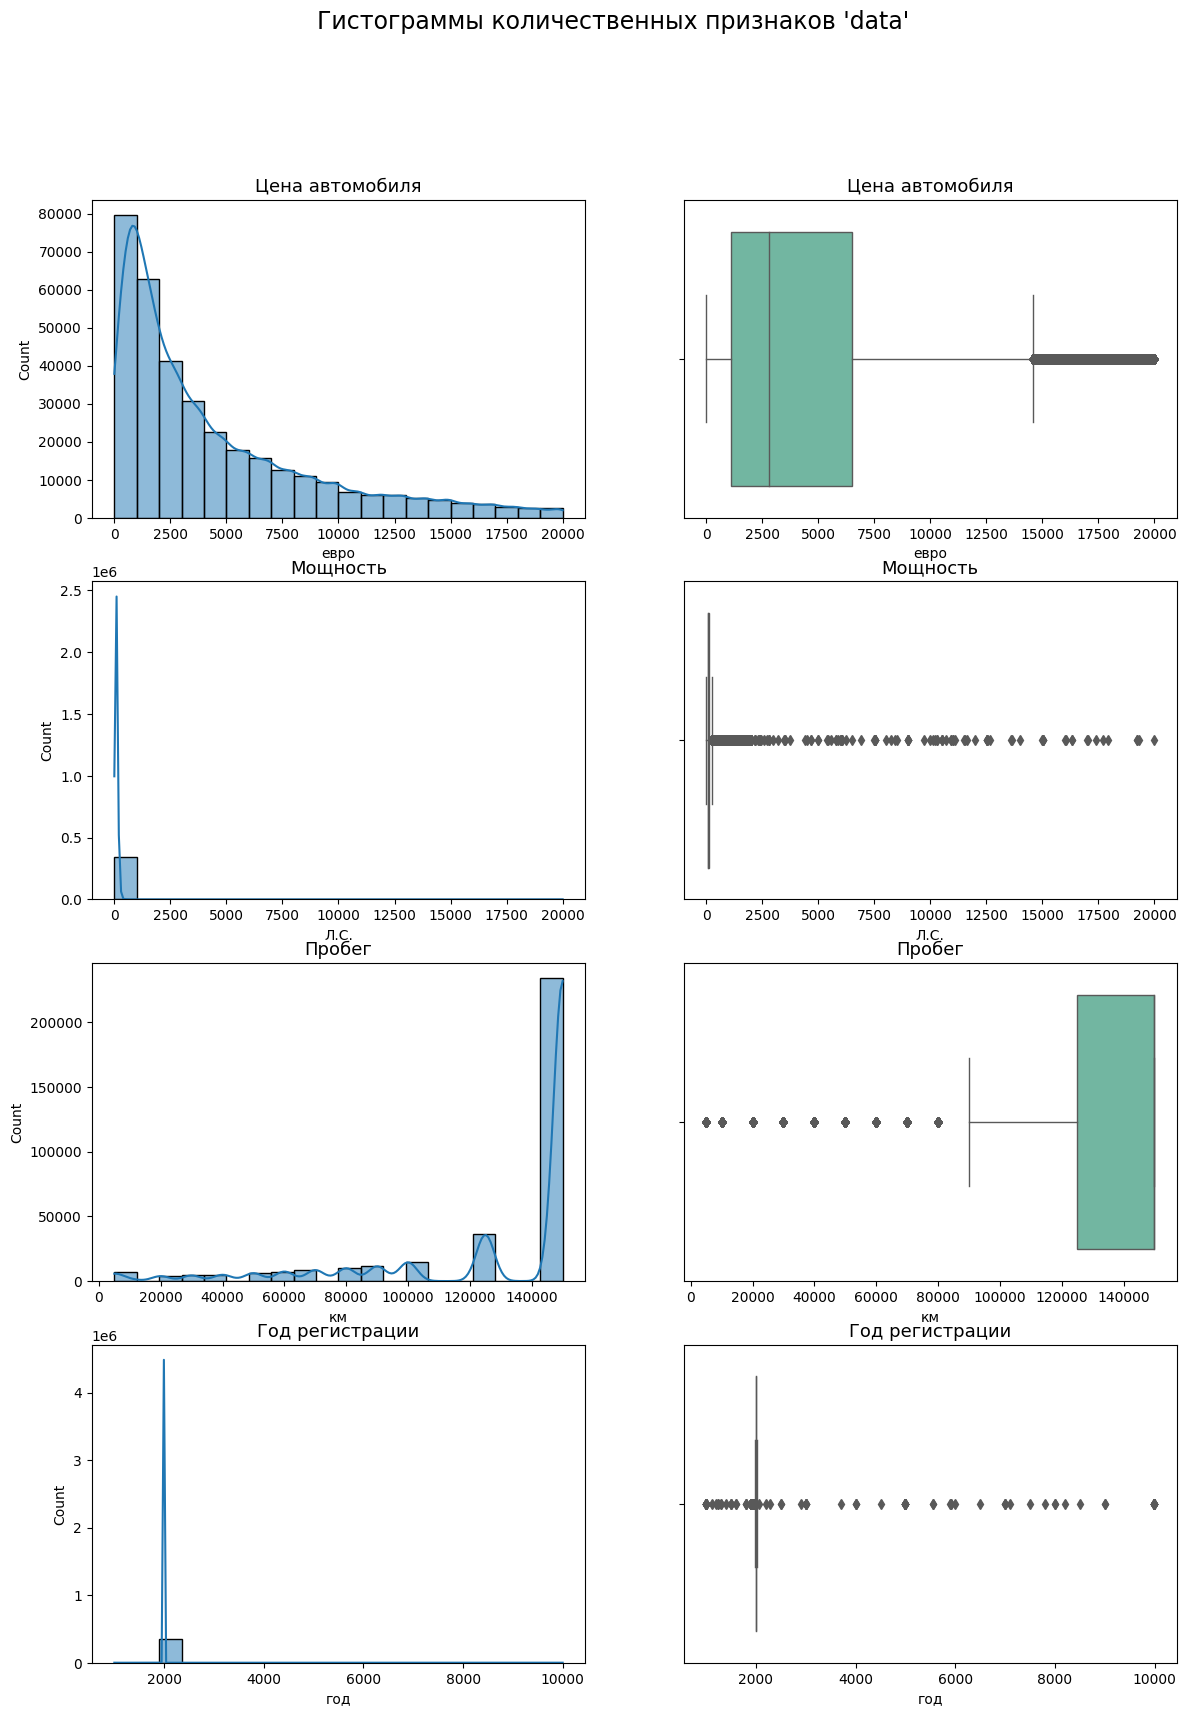

In [49]:
draw()

У некоторых пользователей цена авто стоит 100 и меньше евро, что, скорее всего говорит об аварийном состоянии. Отсеем тех, у кого цена - 0 евро

In [50]:
print('Процент удаляемых данных:', (1-(data.query('price > 0')['price'].count()) / data['price'].count()) * 100)

Процент удаляемых данных: 2.741586483126923


In [51]:
data = data.query('price > 0')

**Вывод по количественным признакам:**

Цена автомобиля и его пробег выглядят правдоподобно, что нельзя сказать о дате регистрации и его мощности. Скорее всего, пользователи ставят рандомные значения в этих полях. Отсеем неправдоподобные данные.

In [52]:
data['registration_year'].sort_values().unique()

array([1000, 1001, 1234, 1300, 1400, 1500, 1600, 1602, 1800, 1910, 1923,
       1925, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2066, 2200, 2290, 2500, 2900, 3000,
       3700, 4000, 4500, 5000, 5555, 5900, 5911, 6000, 6500, 7000, 7100,
       7800, 8000, 8200, 8500, 9000, 9999], dtype=int64)

Сразу ограничим данные в `registration_year` с 1985

In [53]:
print('Процент удаляемых данных:', (1-(data.query('1985 <= registration_year <= 2016')['registration_year'].count()) / data['registration_year'].count()) * 100)

Процент удаляемых данных: 4.943078270336798


In [54]:
data = data.query('1985 <= registration_year <= 2016')

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:

 



- Стоит обратить внимание что верхняя граница — 2016 год - год выгрузки базы. Если есть строчка с больше 2016, то это явно ошиибка заполнения, такое лучше убрать

 



<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Не обратил внимания даже. Исправил

In [55]:
print('Процент удаляемых данных:', (1-(data.query('power <= 1000 and power >= 50')['power'].count()) / data['power'].count()) * 100)

Процент удаляемых данных: 10.77466542172425


In [56]:
data = data.query('power <= 1000 and power >= 50')

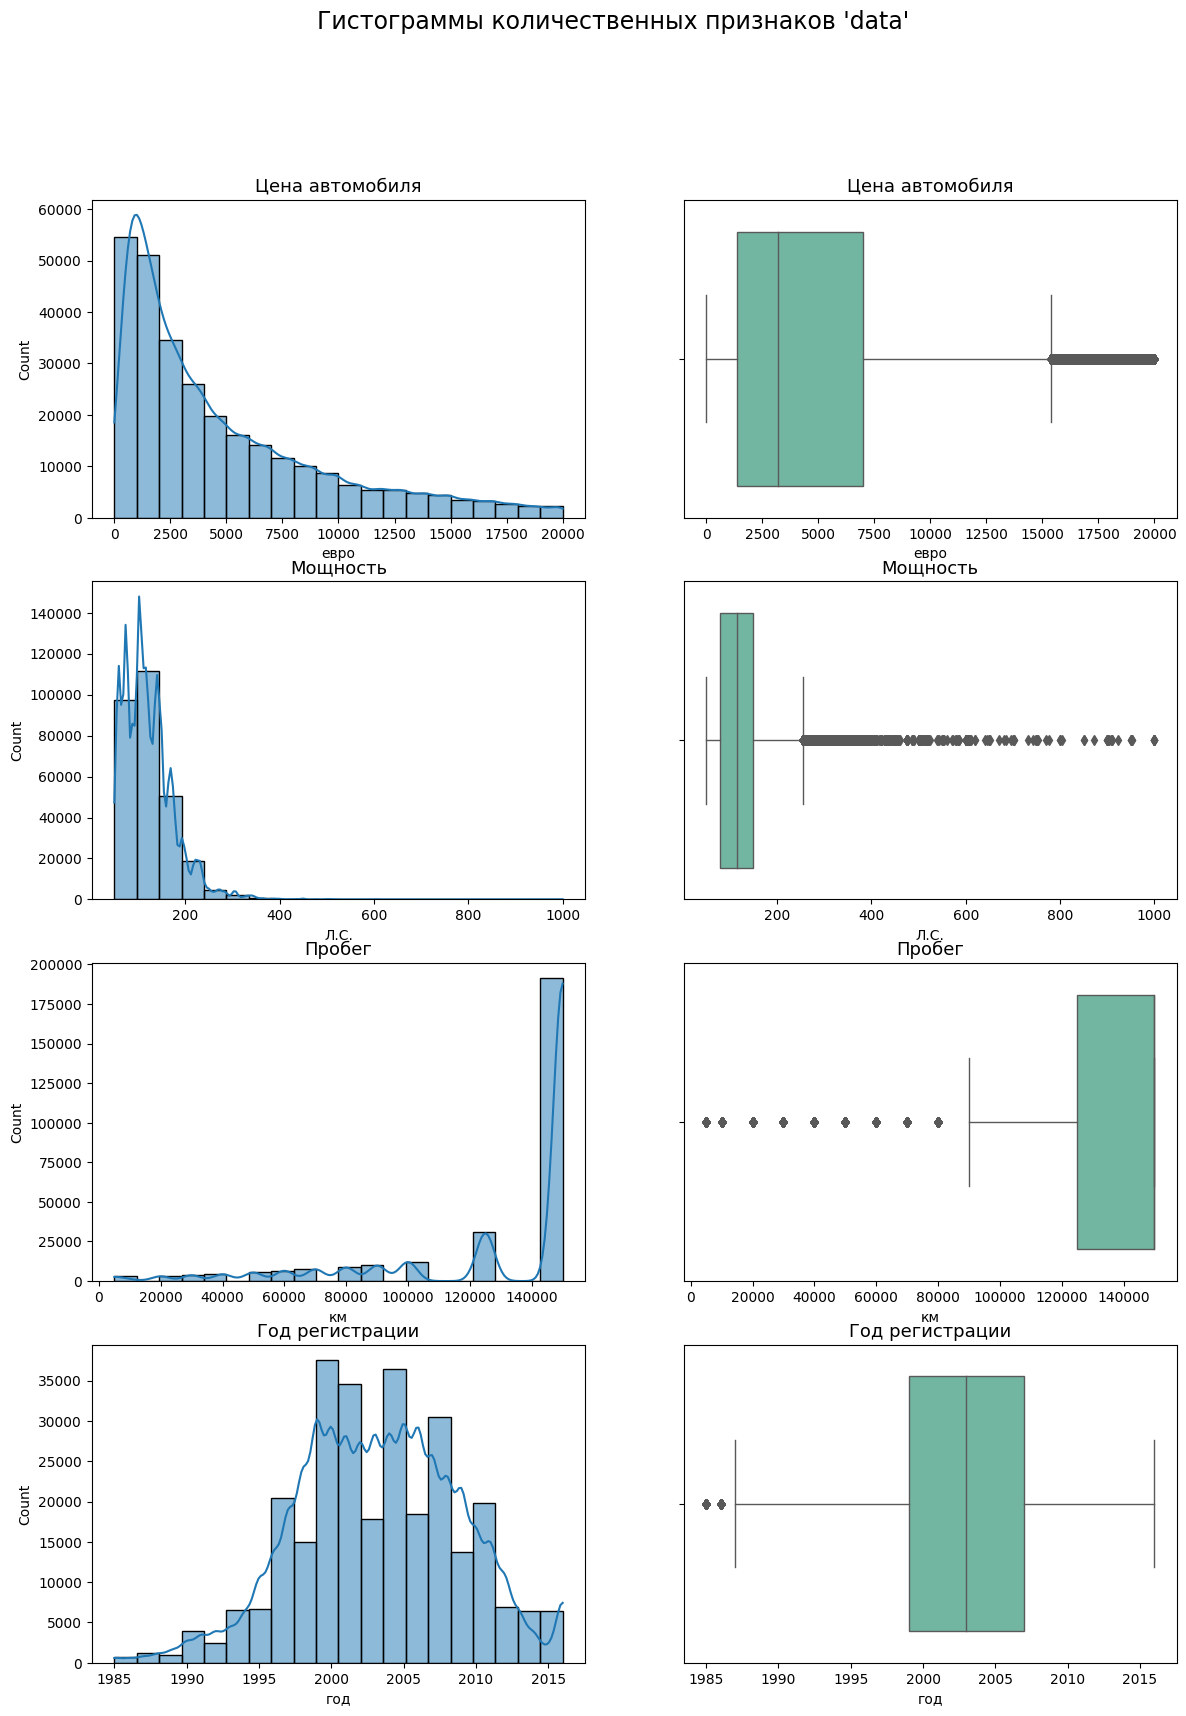

In [57]:
draw()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Отличный график, здорово Что написал функцию


 

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Есть работа с аномалиями


 

**Категориальные признаки**

Так как в столбцах `model`, `brand`, `fuel_type` много категорий, графики будут мало информативны. Ограничимся следующими признаками:

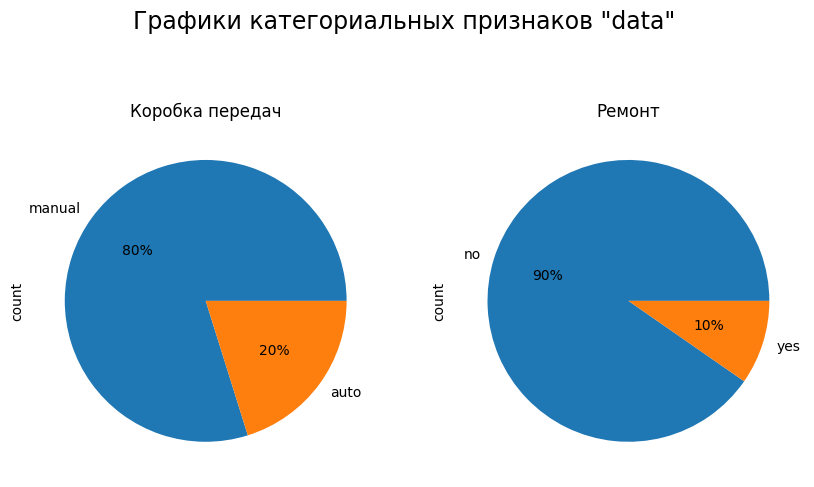

In [58]:
plt.figure(figsize=(10, 6))
plt.suptitle('Графики категориальных признаков "data"', fontsize=17)

plt.subplot(1, 2, 1)
data['gearbox'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Коробка передач')

plt.subplot(1, 2, 2)
data['repaired'].value_counts().plot(kind='pie', autopct='%1.0f%%', title='Ремонт')

plt.show()

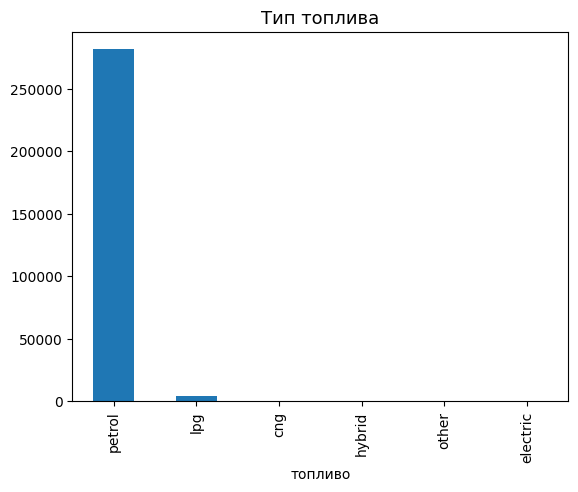

In [59]:
plt.title('Тип топлива', fontsize=13)
data['fuel_type'].value_counts().plot(kind='bar', xlabel='топливо')
plt.show()

 



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Правильно что строишь разные типы графиков для разных типов данных.  Отличные графики и оформлены хорошо 
    
    

<div class="alert alert-warning">
   
    
Совет: 
 
- Подумай о лучшем размещении графиков, сейчас это длинный ряд графиков, который надо прокручивать вниз, почему бы не использовать [subplots](https://nagornyy.me/it/vizualizatsiia-dannykh-v-matplotlib/) и не разместить графики еще и по вертикали в два или три столбца!? Используя histplot (boxplot) и countplot это легко сделать 
 

- Кстати для числовых признаков лучше одновременно строить график типа hist и boxplot. Гистограмма - позволяет нам увидеть, как данные распределены.  Boxplot  помогает нам понять разброс данных и выявить аномалии. И  можно красиво разместить их с помощью subplots - в одном столбце строим гистограмму ждля признака, в другом boxplot.  И если ты это сделаешь, то конечно лучше сразу оформить в виде функции, чтобы можно было использовать в следующих проектах (в качестве аргументов подаём dataset и названия столбцов с количественными признаками)

 



In [60]:
numeric_cols = data.select_dtypes(include=['number'])

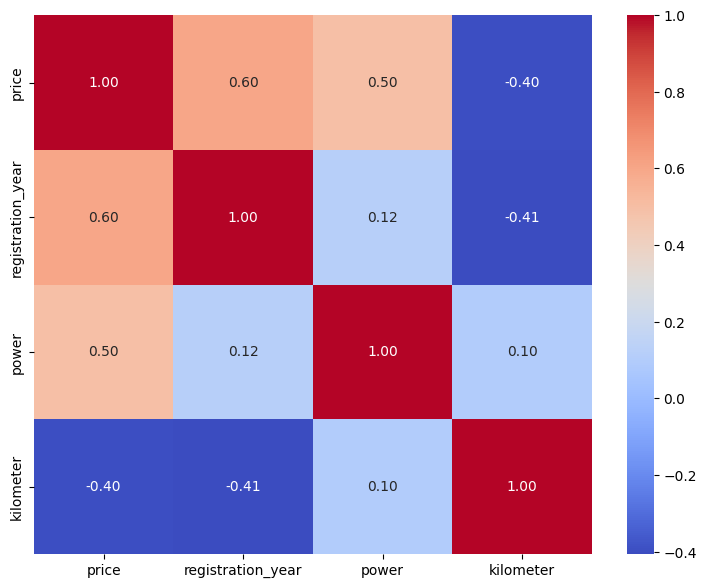

In [61]:
plt.figure(figsize=(9, 7))
sns.heatmap(numeric_cols.corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt='.2f');

 


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍

  

<div class="alert alert-warning">


Совет: 


- коэффициент Пирсона (который использован) подходит для колличественных и нормально распределенных, для ненормально распределённых используем Спирмена   
    
    
- можно поменять политру для удобства восприятия, через добавление cmap='coolwarm' ('bwr', 'seismic'), тогда чем ближе корреляция к 1 тем красней, чем ближе к -1 тем "синей" , ну и чем меньше связи, чем ближе к 0, тем нейтальней цвет





In [62]:
data.shape

(286681, 10)

**ВЫВОДЫ:**

1. Цена автомобиля и его пробег выглядят достаточно правдоподобно;
2. В признаках "мощность" и "год регистрации" были аномалии, мы их удалили;
3. Большинство коробок после заполнения пропусков стали механическими (80%);
4. Самое популярное топливо - бензин, с большим отрывом, затем газ;
5. Цена и год регистрации, а также цена и мощность имееют умеренную корреляцию.
6. После всех манипуляций в датасете осталось 295 тыс строк и 10 столбцов


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:






Промежуточный вывод на месте 


 
<div class="alert alert-warning">


Совет 🤔:


 

- работа пропусками тема очень тонкая, ведь в любом случае будет происходить искажение данных, каждый новый датасетом скорее всего надо будет требовать какой-то свой уникальный способ работы с пропусками, а как именно - это придёт с опытом. Тут можешь посмотреть какие вообще способы и подходы можно использовать  [первая часть](https://www.dmitrymakarov.ru/data-analysis/nan-06/) ,   [вторая часть](https://www.dmitrymakarov.ru/data-analysis/nan-06-2/) 

 
<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>




Совет 🤔:



 

В этом проекте стоит вопрос о выборе модели в том числе на основе затраченного времени, можно попробовать ускориться,  ссжав датасет, приведя его в более экономный тип, с помощью функции которая гуляет на просторах интернета

    # Оптимизация числовых типов данных
    def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2    
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)  
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)    
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                             .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df
                                                                                                   
                                                                                                   
Проверяет минимальное и максимальное значения в столбце. Если значения могут уместиться в типе данных меньшего размера (например, np.int8 вместо np.int16), столбец конвертируется в более компактный тип данных. И для оценки стоило всё это начинать, подсчитывается размер занимаемой памяти DataFrame до и после оптимизации и выводит разницу в процентах
                                                                                                   

# Обучение моделей

In [63]:
# Оптимизация числовых типов данных
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
    '''
    Function optimizes memory usage in dataframe
    df: pd.DataFrame - data table
    print_size: bool - display of optimization results
    return pd.DataFrame - amount of optimized memory
    '''
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
    # Размер занимаемой памяти до оптимизации (в Мб)
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in numerics:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)
                else:
                    df[column] = df[column].astype(np.float64)    
    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                         .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return df

In [64]:
data = optimize_memory_usage(data)

Размер использования памяти: до 24.06 Mb - после 18.04 Mb (25.0%)


## Подготовка данных

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Это лучше поставить сразу после импортов 

In [65]:
X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    random_state=RANDOM_STATE,
    test_size=0.5
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid,
    y_valid,
    random_state=RANDOM_STATE,
    test_size=0.5
)

In [66]:
num_columns = ['registration_year', 'power', 'kilometer']
cat_columns = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']

In [67]:
def fit_model(parameters):
    encode_pipe = Pipeline(
        [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])

    data_preprocessor = ColumnTransformer(
        [('encode', encode_pipe, cat_columns),
         ('num', StandardScaler(), num_columns)], 
         remainder='passthrough')
    
    pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
    ])

    randomized_search = RandomizedSearchCV(
        pipe_final, 
        parameters, 
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    randomized_search.fit(X_train, y_train)
    
    print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
    print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_ * -1)

    return randomized_search.best_estimator_, randomized_search.best_score_ * -1

## Модели

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:


test датасет используем в самом конце, когда тестируем лучшую модель 


Поэтому подсчёт её стоит убрать из функций



### LinearRegression()

In [68]:
linear_reg_grid = [
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [69]:
lr_model, lr_rmse = fit_model(linear_reg_grid)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_type', 'gearbox',
                                                   'model', 'fuel_type',
                                                   'brand', 'repaired']),
            

In [70]:
start = time.time()
lr_model.fit(X_train, y_train)
lr_fit_time = time.time() - start
print('Время обучения на тренировочной выборке:', lr_fit_time)

Время обучения на тренировочной выборке: 6.429973602294922


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Ошибка ❌:




Тут опять используешь тестовую выборку до того как выбрал лучшую модель. 
    
О логике использования выбор    
    
1. На train мы обучаем
2. По валидации смотрим на результаты обучения (следим чтобы не было переобучения и/или делаем подбор гиперпараметров).  И выбираем лучшую модель (когда используем RandomizedSearchCV То валидационная выборка создаётся им самим внутри себя, нужно только посмотреть на нее с помощью .best_score_). 
3. Тестовая (out-of_sample) у нас для финальной проверки, когда определена модель с конкретными гиперпараметрами. Использование тестовой выборки, чтобы еще раз посмотреть на модели - это нарушение логической цепочки моделирования. 

 
 [Вот](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0   ) тут можно дополнительно почитать.   
    
    
    
Ещё такой момент:
    
    
    print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_ * -1)  ----->  
    
    print ('Метрика лучшей модели на КРОСС ВАЛИДАЦИОННОЙ выборке:', randomized_search.best_score_ * -1)

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента V2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 

Разве наша лучшая модель - не та, что я с функции вывел randomized_search.best_estimator_? 

Как я понимаю задачу:
1. я выбираю три модели - линейная регрессия, CatBoost и LGMB. В линейной я обучил модель на тренировочных данных и мне она вывела метрику лучшей модели на тренировочной/валидационной выборке .best_score_ около 2400. Теперь я должен посмотреть как долго она обучается на тренировочной выборке:

```python
start = time.time()
lr_model.fit(X_train, y_train)
lr_fit_time = time.time() - start
```

Потому что если я напишу так:

```python
    randomized_search = RandomizedSearchCV(
        pipe_final, 
        parameters, 
        cv=5,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1
    )
    start = time.time() # Подсчет тут
    randomized_search.fit(X_train, y_train)
    end = time.time() #
```

то я посчитаю общее время обучения для моделей с разными параметрами, а не для лучшей модели. 

2. Далее, для того, чтобы понять сколько она тратит время на предсказание, я должен сделать предсказание на тестовой выборке, заодно и посчитать метрику. И тоже самое сделать с CatBoost и LGBM. Или же я должен делать этот анализ, предварительно разделив выборки на тренировочную, валидационную и тестовую? Допустим в RSCV на валидационной уже есть метрика RMSE=2481. Сейчас мне надо сделать предсказание на валидационной для CatBoost и LGBM, и уже в таблице сравнить их? 
4. А после выбрать из троих самую точную / быструю и уже на ней применить **тестовую** выборку



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


    Разве наша лучшая модель - не та, что я с функции вывел randomized_search.best_estimator_?
    
   
Если бы ты засунул в pipeline все модели, то да.  А так это только етрика ндля линейной регрессии с лучшими гиперпараметрами    
    
    
- Уточню, .best_score_  это метрика на кросс валидационной выборке. Метрику на тренировочной выборке мы вообще не смотрим, она нам ничего не показывает, потому что высокая иетрика на train может быть результатом переобучения модели    
    
    
    
- По поводу времени - даже если бы ты время прогноза модели смотрел на тестовой выборке я бы ничего не сказал, вопрос что ты используешь для получения метрики на тестовой  все моделеи
    
    
    
    Сейчас мне надо сделать предсказание на валидационной для CatBoost и LGBM, и уже в таблице сравнить их?
    
    
Верно    
    
    
    
    А после выбрать из троих самую точную / быструю и уже на ней применить тестовую выборку
    
    
Да
    
    
    
    
Но вообще это дискуссионный момент, свою логику почему тестовую метрику используем только для лучшей модели я написал, ты  можешь предложить свою логику    


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

    
- Верно, что в случае использования линейной модели категориальные признаки кодированы с помощью OHE 

<div class="alert alert-warning">



Совет 🤔:


 

    
- Можешь объяснить почему для линейных модели технику  `OrdinalEncoder/LabelEncoder`  использовать нельзя, а для  деревянных моделей это не вызывает тех же проблем?



<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 

`OrdinalEncoder` и `LabelEncoder` преобразуют категориальные признаки в числа. Например, "плохо", "нормально" и "хорошо" они могут преобразовать в 0, 1 и 2 соответственно, а линейные модели ищут отношения между этими числами. Это может привести к неверным выводам.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:

    
    
Верно. А если ты подаёшь результаты OE/LabelEncoder в модели на основе деревьев (Случайный лес,  Дерево решений), то это не так страшно, в силу того что модели делают сплиты, они нелинейные, поэтмоу могут подстроиться.  А вот если ты это подашь в линейные модели, то скорее всего получится проблема, потому что  линейная модель, будет стараться построить линию (гиперплоскость) в которой камаз > мерседес > вольво, там никакой подстройки быть не может 

### CatBoostRegressor()

In [71]:
cb_model = CatBoostRegressor(iterations=300, 
                              learning_rate=0.2,
                              cat_features=cat_columns)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍cat_features


Кстати для этой модели тоже можно было устроить подбор гиперпараметров 

In [72]:
start = time.time()
cb_model.fit(X_train, y_train, verbose=30);
end = time.time()
catboost_fit_time = end - start
print('Время обучения CatBoost:', catboost_fit_time)

0:	learn: 4003.8068764	total: 267ms	remaining: 1m 19s
30:	learn: 1785.3130536	total: 3.43s	remaining: 29.8s
60:	learn: 1703.2719024	total: 6.57s	remaining: 25.7s
90:	learn: 1659.5603132	total: 9.62s	remaining: 22.1s
120:	learn: 1629.1927919	total: 12.8s	remaining: 18.9s
150:	learn: 1608.7589685	total: 15.8s	remaining: 15.6s
180:	learn: 1593.9747186	total: 18.8s	remaining: 12.3s
210:	learn: 1578.2534306	total: 22.2s	remaining: 9.35s
240:	learn: 1565.7111320	total: 25.7s	remaining: 6.29s
270:	learn: 1556.5719870	total: 29.1s	remaining: 3.12s
299:	learn: 1548.5409105	total: 32.3s	remaining: 0us
Время обучения CatBoost: 32.96637177467346


### LGBMRegressor()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Получается зада lgbm_grid, но подбора не сделал 

In [73]:
lgbm_data = data.copy()

In [74]:
for c in lgbm_data.columns:
    col_type = lgbm_data[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        lgbm_data[c] = lgbm_data[c].astype('category')

In [75]:
X_lgbm = lgbm_data.drop(['price'], axis=1)
y_lgbm = lgbm_data['price']

In [76]:
X_lgbm_train, X_lgbm_valid, y_lgbm_train, y_lgbm_valid = train_test_split(
    X_lgbm, 
    y_lgbm, 
    train_size=0.6, 
    random_state=RANDOM_STATE)

X_lgbm_valid, X_lgbm_test, y_lgbm_valid, y_lgbm_test = train_test_split(
    X_lgbm_valid, 
    y_lgbm_valid, 
    test_size=0.5, 
    random_state=RANDOM_STATE)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Раз не используешь  RandomizedSearchCV, тогда тебе нужно создавать отдельную валидационную выборку  чтобы посмотреть метрику на ней (Но лучше конечно RandomizedSearchCV + .best_score_)

In [77]:
lgbm_model = LGBMRegressor(num_leaves=200,
                           learning_rate=0.1,
                           random_state=RANDOM_STATE,
                           verbose=1)

In [78]:
start = time.time()
lgbm_model.fit(X_lgbm_train, y_lgbm_train)
end = time.time()
lgbm_fit_time = end - start
print('Время обучения LGBMRegressor:', lgbm_fit_time)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 172008, number of used features: 9
[LightGBM] [Info] Start training from score 4887.762011
Время обучения LGBMRegressor: 2.046990394592285




<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


И для  LightGBM, не стоит использовать `OneHotEncoder()` или его более простой аналог `get_dummies()` , или `OrdinalEncoder` . Стоит использовать собственные кодировщики.  Тут всё просто, предварительно приводим нужные столбцы к типу category (.astype('category')), и модель будет  обрабатывать их как категориальные. 



<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Я не смог в пайплайнах перевести столбцы в тип `category`, поэтому решил без них и кроссвалидации обучить модель

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет:



pipeline   не нужен, ведь никакой утечки данных тут не будет. И шкалировать данные не нужны для бустинга 


 

# Анализ моделей

**LinearRegression**

In [79]:
start = time.time()
predictions = lr_model.predict(X_valid)
end = time.time()
lr_predict_time = end - start
lr_rmse = mean_squared_error(y_valid, predictions, squared=False)
print('Метрика RMSE равна', lr_rmse)
print('Время предсказания:', lr_predict_time)

Метрика RMSE равна 2479.9873837782775
Время предсказания: 0.31781673431396484


**CatBoostRegressor**

In [81]:
start = time.time()
predictions = cb_model.predict(X_valid)
end = time.time()
catboost_predict_time = end - start
catboost_rmse = mean_squared_error(y_valid, predictions, squared=False)
print('Метрика RMSE равна', catboost_rmse)
print('Время предсказания:', catboost_predict_time)

Метрика RMSE равна 1603.7751993542272
Время предсказания: 0.26784682273864746


**LGBMRegressor**

In [82]:
start = time.time()
predictions = lgbm_model.predict(X_lgbm_valid, num_iteration=lgbm_model.best_iteration_)
end = time.time()
lgbm_predict_time = end - start
lgbm_rmse = mean_squared_error(y_lgbm_valid, predictions, squared=False)
print('Метрика RMSE равна', lgbm_rmse)
print('Время предсказания:', lgbm_predict_time)

Метрика RMSE равна 1504.5302358775796
Время предсказания: 0.6346390247344971


In [83]:
results = pd.DataFrame({
    'LinearRegression': [lr_rmse, lr_fit_time, lr_predict_time],
    'CatBoostRegressor': [catboost_rmse, catboost_fit_time, catboost_predict_time],
    'LGBMRegressor': [lgbm_rmse, lgbm_fit_time, lgbm_predict_time]
}, index=['Метрика RMSE', 'Время обучения', 'Время предсказания'])

In [84]:
results.T

,Метрика RMSE,Время обучения,Время предсказания
LinearRegression,2479.987384,6.429974,0.317817
CatBoostRegressor,1603.775199,32.966372,0.267847
LGBMRegressor,1504.530236,2.046990,0.634639



<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

А вот тут, в самом конце,  выбрав лучшую модель на валидации, проверяем ее на тестовом датасете - делаем финальное тестирование. И если лучшая модель выбранная на валидационной покажет на test результат хуже требуемого, мы начнем процесс моделирования сначала (а не будем такие - "а давай попробуем на тесте модель которая на валидации не была лучшей, может она нам на test даст нужное качество").         
    
Почему только лучшая?! Это делается для того, чтобы мы даже незначительным образом не "подгонялись" под тестовую выборку. Ведь на train модели обучаются, по валидиации подгоняются гиперпараметры. Эти данные модели "знают". А test (out-of-sample) это уже моделирование прогноза на реальных данных и ситуации когда у нас есть уже лучшая модель (в рельности у нас же не может быть несоклько прогнозов, что то в любом случаи надо выбирать). Вот поэтому такая двухуровневая проверка на подгонку. Кроме того использование мноих моделей с разными гиперпараметрами это тоже подгонка, поэтому выбирая одну и тестируя только ее, мы тем самым боремся с подгонкой через использование многих-многих моделей, когда результат хорош не потому что мы данные почистили хорошо, моделировали правильно итд итп, а потому что из многих моделей хоть какая то случайно "сыграет". 


Проверяем модель с лучшей метрикой на тестовой выборке:

In [85]:
start = time.time()
predictions = lgbm_model.predict(X_lgbm_test, num_iteration=lgbm_model.best_iteration_)
end = time.time()
lgbm_predict_time = end - start
lgbm_rmse = mean_squared_error(y_lgbm_test, predictions, squared=False)
print('Метрика RMSE равна', lgbm_rmse)
print('Время предсказания:', lgbm_predict_time)

Метрика RMSE равна 1518.961084975984
Время предсказания: 0.5576810836791992


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV3</b></font>



Успех 👍:



теперь логика использование выборок не нарушена


 

**ИТОГИ**

1. Метрика:

    Как видно из результатов, меньшие значения RMSE для CatBoost и LGBMRegressor указывают на более высокую точность предсказаний по сравнению с Linear Regression. Это свидетельствует о том, что CatBoost и LGBMRegressor имеют меньшую среднеквадратичную ошибку.

2. Время обучения:

    LGBMRegressor значительно превосходит остальные модели в скорости обучения, требуя лишь 2.57 секунды. В то время как Linear Regression требует 9.92 секунд, а CatBoost - 46.96 секунд. Это может указывать на то, что LGBMRegressor обладает большей эффективностью в обучении на данном наборе данных.

3. Время предсказания:

    CatBoost оказался самым быстрым в предсказании с временем 0.25 секунд, за которой следует Linear Regression с временем 0.30 секунд, а LGBMRegressor показал самое долгое время предсказания - 0.58 секунд

**Лучшей моделью из трех оказалась LightBGM с результатами на валидационной выборке RMSE = 1504.53, время прогноза = 0.63 сек**

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


А как думаешь продакшн что важнее время обучения или предсказания? 

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Я думаю, что в продакшне важна метрика и время предсказания

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Я тоже так думаю


 

# Вывод

**Предобработка данных:** 

В ходе предобработки данных, мы загрузили датасет, состоящий из 350 тыс строк и 16 столбцов, и выявили пропуски и дубликаты, которые в скоре устранили

**Исследовательский анализ данных:**

В ходе исследовательского анализа, мы узнали, что в признаках "мощность" и "год регистрации" присутствовали аномалии, которые мы вскоре удалили. Большинство коробок после заполнения пропусков стали механическими (80%). Самое популярное топливо - бензин, с большим отрывом, затем газ. Цена и год регистрации, а также цена и мощность имееют умеренную корреляцию. После всех манипуляций в датасете осталось 295 тыс строк и 10 столбцов

**Обучение модели:**

Мы обучили три модели: линейную регрессию, CatBoostRegressor и LGBMRegressor. Линейной регрессии передали два скэлера - `StandartScaler` и `MinMaxScaler`. CatBoost передали гиперпараметры: iterations=300, learning_rate=0.2. Для LGBMRegressor скопировали датафрейм, в котором категориальные столбцы перевели в тип данных `category` и задали гиперпараметры num_leaves=200, learning_rate=0.1. Результаты мы оценивали по трем характеристикам: 
1. метрика - корень квадратный из среднеквадратичной ошибки (RMSE)
2. время обучения модели
3. время предсказания модели

Результаты:

| Модель              | Метрика RMSE | Время обучения | Время предсказания |
|---------------------|--------------|----------------|--------------------|
| LinearRegression    | 2480.930204  | 9.917349       | 0.302706           |
| CatBoostRegressor   | 1594.928798  | 46.958233      | 0.256853           |
| LGBMRegressor       | 1503.645543  | 2.572725       | 0.583668           |




Исходя из этих результатов, если приоритетом является высокая точность предсказания, то стоит предпочесть CatBoost или LGBMRegressor, особенно если есть большие объемы данных и скорость обучения является важным фактором. Если важна скорость обучения и предсказания, то Linear Regression мог бы быть выбором, но при этом стоит учитывать его более высокую RMSE.

**Лучшей моделью из трех оказалась LightBGM с результатами на тестовой выборке RMSE = 1518.96, время прогноза = 0.56 сек.**

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

В конце проекта принято кратко описывать все проделанные шаги и полученные результаты. Зачем это нужно - когда проект захочет посмотреть будущий работодатель, у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, но захочет изучить результат, который будет в общем выводе. Поэтому все же советую написать общий вывод пообьемней: добавить пару слов о данных, работе с ними, о моделях, метриках

 

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Юсуп, у тебя старательно выполненная работа, все четко, осмысленно. Здорово что для подбора гиперпараметров используешь GS, оставил советы по использованию его в связке с pipeline + ColumnsTransformer. Хорошо поработал с данными


    
    
    

Обязательное к исправлению:


    
    

- стоит обратить внимание что верхняя граница — 2016 год - год выгрузки базы

    
    
    
- возможно переусердствовал с удалением дубликатов    
    
     

- на test датасете тестируем только лучшую модель (нарушена логика использования датасетов при моделировании)

    
- для бустингов (LighGBM) не стоит использовать OneHotEncoder()/.get_dummies, не забываем использовать встренные инструменты работы с категориальными признаками  
    
    
- стоит общий вывод (лицо проекта) доработать    
 
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


</div>



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    
 

Что осталось из красного:

- Нарушена логика использования тестовой выборки.  Мы её используем только в самом конце, и тольбко для лучшей модели выбранной по двум критериям - метрика на кросс валидации (валидации) + время 


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV3</b></font>

Спасибо за работу!   Постарался ответить на твои вопросы  

    
Красное исправлено. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.


    
  
Отличная работа Юсуп. Желаю успехов в дальнейшей учебе!



# Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей
- [x]  НЕ ЗАБЫТЬ ПРО ДУБЛИКАТЫ!
